In [106]:
import krp_sp as k
import sentencepiece as spm
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import networkx as nx
import pandas as pd
import codecs
from collections import Counter
from collections import defaultdict
from operator import itemgetter
import numpy as np
import community
# load the log values : , log=True
#ms, md, mv = k.loadmodels(flag="m2",  use_krp_names=False)
#len(md)

In [4]:

def report(flag, up=40, lo=10, w=None, cutoff=10, krp=False):
    ms, md, mv = k.loadmodels(flag=flag, use_krp_names=False)
    if krp:
        m="m0-krp-30000.model"
        ms, md, mv = add_model(m, ms, md, mv, use_krp_names=False)    
    vx = k.agg_voclist(mv, md, w=w)
    v2 = k.red_voclist(vx, up=up, lo=lo)
    sx = k.vocmatrix(v2, size=len(md), vsize=len(mv[0]), w=w)
    res = k.evalvocmatrix(sx, ms, cutoff=cutoff)
    return res

In [ ]:
def make_res(ms, md, mv, up=40, lo=10, w=None, cutoff=10):
    vx = k.agg_voclist(mv, md, w=w)
    v2 = k.red_voclist(vx, up=up, lo=lo)
    sx = k.vocmatrix(v2, size=len(md), vsize=len(mv[0]), w=w)
    res = k.evalvocmatrix(sx, ms, cutoff=cutoff)
    return res    

In [ ]:
def add_model(m, ms, md, mv, use_krp_names=True):
    mdir = "model"
    sp = spm.SentencePieceProcessor()
    vl = k.loadvoc(m)
    mv.append(vl)
    sp.load("%s/%s" % (mdir, m))
    md.append(sp)
    if use_krp_names:
        ms.append(krp_names[m.split("-")[1]])
    else:
        ms.append(m.split("-")[1])
    return (ms, md, mv)


In [2]:
flag="m5"
ms, md, mv = k.loadmodels(flag=flag, use_krp_names=False)
vx = k.agg_voclist(mv, md)

flag="m2"
ms, md, mv = k.loadmodels(flag=flag,  use_krp_names=False)
m="m0-krp-30000.model"
ms, md, mv = add_model(m, ms, md, mv, use_krp_names=False)

In [110]:
flags=["m2", "m5", "m7", "m9"]
labels={"m2" : "30000", "m5" : "20000", "m7" : "15000", "m9" : "10000", 
        "None" : "Count", "score" : "Comb.prop", "pos" : "Position"}
limits=[(70,35), (30, 5), (3,1)]
weights=[None, 'score', 'pos']
of=codecs.open("report1.txt", "w", "utf-8")
reps=[]
cnt=0
ct=10
for flag in flags:
    for up, lo in limits:
        for w in weights:
            res=report(flag, up, lo, w)
            if w is None:
                w="None"
            flx=(flag, up, lo, w)
            #print(flx)
            ofh=codecs.open("rep/%s-%3.3d-%3.3d-%s.html" % flx, "w", "utf-8")
            ofh.write("""<html><head>
  <meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
  </head><body><h1>Result for calculation %d</h1>
            <p>Parameters: Vocab.size:%s, limits: %d,%d, Combination: %s</p>
            <table>\n""" % (cnt, labels[flag], up, lo, labels[w]))
            ofh.write("<tr><th>部類</th><th>Self/Other</th><th>Most related部類</th></tr>")
            reps.append((flx, res))
            cnt += 1
            if w is None:
                info = "flag:%s,up:%d,lo:%d,score:None" % (flag, up, lo)
            else:
                info = "flag:%s,up:%d,lo:%d,score:%s" % (flag, up, lo, w)
            of.write("====\n%s\n\n" % (info))    
            kr=list(res.keys())
            kr.sort()
            bu=defaultdict(list)
            bldict={}
            for r in kr:
                s = r[0:3]
                c = Counter([a[0][0:3] for a in res[r]])
                other = sum([a[1] for a in c.items() if a[0] != s])
                bu[s].append((c[s], other))
                bldict[r] = "%2.2d / %2.2d" % (c[s], other)
            for r in kr:
                # should integrate the following table here!
                rvx = evd[r]
                rx=[]
                for a in res[r]:
                    if a[0] in rvx:
                        rtmp="<b>%s:%s</b>" % (a[0], k.krp_names[a[0]])
                    else:
                        rtmp="%s:%s" % (a[0], k.krp_names[a[0]])
                    rx.append(rtmp)
                #rx=["%s:%s" % (a[0], k.krp_names[a[0]]) for a in res[r]]
                #ofh.write("%s\t%s\t%s\t%s\n" % (r, k.krp_names[r], bldict[r], ",".join(rx[0:5])))
                ofh.write("<tr><td>%s %s</td><td>%s</td><td>%s</td></tr>\n" % (r, k.krp_names[r], bldict[r], ",".join(rx[0:ct])))
            #of.write("\n==Self/other\n")
            ofh.write("</table></body></html>")
            ofh.close()
            of.write("\n==s/o, bu\n")
            bs=list(bu.keys())
            bs.sort()
            for b in bs:
                of.write("%s\t%d\t%d\t%s\n" % (b, sum([a[0] for a in bu[b]]), sum([a[1] for a in bu[b]]), info))
of.close()

In [ ]:
len(reps)

In [ ]:
from operator import itemgetter
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]

In [ ]:
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
hub_ego = nx.ego_graph(G, largest_hub)
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='b', node_size=10, with_labels=True)
    # Draw ego as large and red
#nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=600, node_color='r')
#plt.show()

In [ ]:
hub_ego

In [ ]:
for i in nx.connected_component_subgraphs(G):
    dir(i)

In [ ]:
nx.write_gexf(G, "test.gexf")

In [ ]:
sx = k.vocmatrix(v2, size=75, w=w)

In [ ]:
ms

Prepare the dictionary that holds the calculation results

In [17]:
bud=defaultdict(lambda: defaultdict(list))
#bus=defaultdict(list)
for fl, res in reps:
    key="%s-%3.3d-%3.3d-%s.html" % fl
    #key = "%d/%d:%s" % fl[1:]
    k1 = fl[0]
    rk=list(res.keys())
    rk.sort()
    bu=defaultdict(list)
    for r in rk:
        s = r[0:3]
        c = Counter([a[0][0:3] for a in res[r]])
        other = sum([a[1] for a in c.items()]) - c[s]
        bu[s].append((c[s], other))
    bs=list(bu.keys())
    bs.sort()
    for b in bs:
        bud[b][k1].append((key, sum([a[0] for a in bu[b]]), 
                                 sum([a[1] for a in bu[b]])))
        #bus[b].append((key, sum([a[0] for a in bu[b]]), sum([a[1] for a in bu[b]])))
    
    #print (rk)

In [101]:
bus=[]
pd = {1:3,2:5,3:6}
vt="eval.txt"
evd=defaultdict(list)
for line in codecs.open(vt, "r", "utf-8"):
    l=line[:-1].split("\t")
    bl = l[0].split()[0]
    for bx in l[1].split(","):
        if ":" in bx:
            evd[bl].append(bx.split(":")[0])
ek = list(evd.keys())
ek.sort()
for fl, res in reps:
    key="%s-%3.3d-%3.3d-%s" % fl
    #key = "%d/%d:%s" % fl[1:]
    k1 = fl[0]
    rk=list(evd.keys())
    rk.sort()
    evsum = 0
    for r in rk:
        if r in res:
            rl = [a[0] for a in res[r][:3]]
            for a in rl:
                if r in ek:
                    if a in evd[r]:
                        evsum +=  (10 - rl.index(a))
                        #print(key, a, rl.index(a))
    bus.append((key, evsum))

Print the calculation results to a table. 

In [108]:
flag="m2"
labels={"m2" : "3万", "m5" : "2万", "m7" : "1.5万", "m9" : "1万", 
        "None" : "Count", "score" : "Comb.prop", "pos" : "Position"}
ms, md, mv = k.loadmodels(flag=flag,  use_krp_names=False)
bcnt= Counter([a[0:3] for a in ms if len(a) == 4])
ofh=codecs.open("rep/sp-self-other-results.html", "w", "utf-8")
ofh.write("""<html><head>
  <meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
  </head><body>""")
ofh.write("<h1>Sentencepiece calculation results</h1>")
ofh.write("<h2>Evaluation against <a href='../eval.txt'>standard</a></h2><table>")
ofh.write("<tr><th>VocSize</th><th>Comb.</th><th>上/下</th><th>Score</th><th>Comm.</th></tr>")
st = sorted(bus, key=lambda x : x[1], reverse=True)
for s in st:
    ss=tuple(map(int, s[0].split('-')[1:3]))
    nxx=s[0].split("-")[0]
    w=s[0].split("-")[3].split(".")[0]
    try:
        ccnt = com[s[0]][0]
    except:
        ccnt = 0
    ofh.write("<tr><td>%s</td><td>%s</td><td>%d/%d</td><td><a href='%s.html'>%d</a></td><td><a href='%s-comm.html'>%d</a></td></tr>\n" % (labels[nxx], labels[w], ss[0], ss[1], s[0], s[1], s[0], ccnt))
ofh.write("</table>")
ofh.write("<h2>Self(=same 部) / Other (=other 部) results</h2>")
ofh.write("<p>Results for different values of the upper and lower limits (上下) and vocabulary size (3万, 2万).</p>")
ofh.write("<p>For all subcategories 部類 in a category 部, for the 10 most similar subcategories, a same/other calculation is performed, the maximal score is thus 10 times the number of the subcategories for a given category.</p>")
th2 = "<th>3万</th><th>2万</th><th>1.5万</th><th>1万</th>"
bk=list(bud.keys())
bk.sort()
for bx in bk:
    ofh.write("<h3>%s %s (%d部類)</h3>" % (bx, k.krp_names[bx], bcnt[bx]))
    flags = list(bud[bx].keys())
    flags.sort()
    ofh.write("<table border='1'><caption>Results for %s</caption>" % bx )
    ofh.write("<tr><th>Limit</th><th colspan='4'>Count</th><th colspan='4'>Prob.</th><th colspan='4'>Pos</th></tr>")
    ofh.write("<tr><th>上下</th>%s%s%s</tr>" % (th2, th2, th2))
    rp1 = bud[bx][flags[0]]
    rp2 = bud[bx][flags[1]]
    ofh.write ("<tr>")
    for i, p in enumerate(rp1):
        if (i % 3 == 0):
            ss=tuple(map(int, p[0].split('-')[1:3]))
            ofh.write("</tr><tr><td>%d/%d</td>" % (ss))
        val = (p[1] / sum(p[1:])) * 100
        ofh.write ("<td><a href='%s'>%2.2f</a></td>\n" % (p[0], val))
        for fx in flags[1:]:
            #print( bud[bx][fx][i])
            px=bud[bx][fx][i]
            val = (px[1] / sum(px[1:])) * 100
            ofh.write ("<td><a href='%s'>%2.2f</a></td>\n" % (px[0], val))
    ofh.write ("</tr>")
    ofh.write("</table>")
ofh.write("</body></html>")
ofh.close()


In [ ]:
list(bud[bx].keys())

# Network, community detection

In [ ]:
res=reps[4][1]
o=[]
G = nx.Graph()
for r in res:
    for s in res[r]:
        o.append((r, s[0], s[1]))
G.add_weighted_edges_from(o)

In [ ]:
import community
partition = community.best_partition(G)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


In [ ]:
partition = community.best_partition(G)
plist = defaultdict(list)
[plist[a[1]].append(a[0]) for a in partition.items()]
for pl in plist:
    pll=plist[pl]
    pll.sort()
    pll=["%s %s" % (a, k.krp_names[a]) for a in pll]
    print (pl, len(pll), ",".join(pll))

In [ ]:
for g in G.nodes:
    G.nodes[g]['label']=k.krp_names[g]

In [ ]:
nx.write_gexf(G, "test.gexf")

# Vocab size histogram

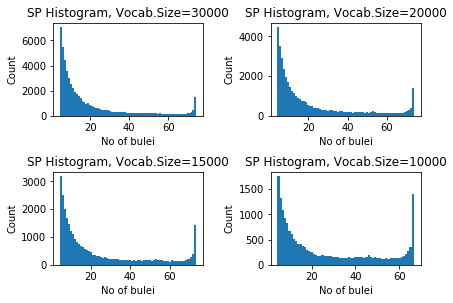

In [26]:
flags=["m2", "m5", "m7", "m9"]
cnt=220
cut=5
width=1
for flag in flags:
    ms, md, mv = k.loadmodels(flag=flag, use_krp_names=False)
    vx = k.agg_voclist(mv, md)
    vsize = len(mv[0])
    labels, values = zip(*Counter([len(a[1]) for a in vx.items()]).items())
    cnt += 1
    plt.subplot(cnt)
    plt.title("SP Histogram, Vocab.Size=%d" % (vsize))
    plt.ylabel("Count")
    plt.xlabel("No of bulei")
    indexes = np.arange(cut, len(labels))
    plt.bar(indexes, values[cut:], width)
    
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.45)    
plt.savefig("vsize-hist-%d.png" % (vsize))
plt.show()


In [37]:
vk=list(vx.keys())

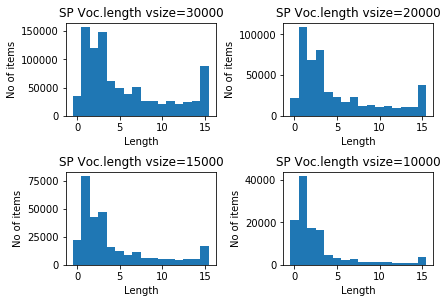

In [58]:
width=1
flags=["m2", "m5", "m7", "m9"]
cnt = 220
for flag in flags:
    ms, md, mv = k.loadmodels(flag=flag, use_krp_names=False)
    vx = k.agg_voclist(mv, md)
    vsize = len(mv[0])
    cut=0
    labels, values = zip(*Counter([len(a[0]) for a in vx.items()]).items())
    cnt += 1
    plt.subplot(cnt)
    plt.title("SP Voc.length vsize=%d" % (vsize))
    plt.ylabel("No of items")
    plt.xlabel("Length")
    indexes = np.arange(cut, len(labels))
    plt.bar(indexes, values[cut:], width)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.45)    
plt.savefig("vlength-hist.png")
plt.show()

In [107]:
res=reps[6][1]
com=defaultdict(list)
for resx in reps:
    res=resx[1]
    name="%s-%3.3d-%3.3d-%s" % resx[0]
    #res=reps[6][1]
    o=[]
    G = nx.Graph()
    for r in res:
        for s in res[r]:
            o.append((r, s[0], s[1]))
    G.add_weighted_edges_from(o)
    for g in G.nodes:
        G.nodes[g]['label']=k.krp_names[g]
    G.graph["name"] = name
    nx.write_gexf(G, "rep/%s-%3.3d-%3.3d-%s.gexf" % resx[0])
    partition = community.best_partition(G)
    size = float(len(set(partition.values())))
    plist = defaultdict(list)
    [plist[a[1]].append(a[0]) for a in partition.items()]
    com[name].append(len(plist))
    ofh=codecs.open("rep/%s-%3.3d-%3.3d-%s-comm.html" % resx[0], "w", "utf-8")
    ofh.write("""<html><head>
  <meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
  </head><body>""")
    ofh.write("# Parameters: %s %d/%d %s\n" % (resx[0]))
    ofh.write("# Communities: %d\n" % (len(plist)))
    ofh.write("<table><tr><th>No</th><th>Size</th><th>Members</th></tr>")
    for pl in plist:
        pll=plist[pl]
        pll.sort()
        pll=["%s %s" % (a, k.krp_names[a]) for a in pll]
        ofh.write("<tr><td>%d</td><td>%d</td><td>%s</td></tr>\n" % (pl, len(pll), ",".join(pll)))
    ofh.write("</table></body></html>\n")
    ofh.close()
    

In [97]:
com

defaultdict(list,
            {'m2-003-001-None': [6],
             'm2-003-001-pos': [6],
             'm2-003-001-score': [6],
             'm2-030-005-None': [4],
             'm2-030-005-pos': [4],
             'm2-030-005-score': [4],
             'm2-070-035-None': [4],
             'm2-070-035-pos': [5],
             'm2-070-035-score': [3],
             'm5-003-001-None': [6],
             'm5-003-001-pos': [6],
             'm5-003-001-score': [6],
             'm5-030-005-None': [5],
             'm5-030-005-pos': [4],
             'm5-030-005-score': [3],
             'm5-070-035-None': [4],
             'm5-070-035-pos': [4],
             'm5-070-035-score': [3],
             'm7-003-001-None': [6],
             'm7-003-001-pos': [6],
             'm7-003-001-score': [6],
             'm7-030-005-None': [5],
             'm7-030-005-pos': [4],
             'm7-030-005-score': [3],
             'm7-070-035-None': [4],
             'm7-070-035-pos': [4],
             'm7-070-

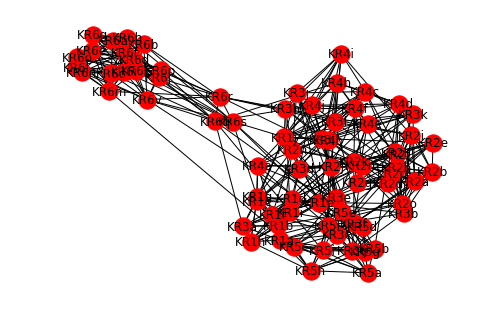

In [86]:
nx.draw(G, with_labels=True)

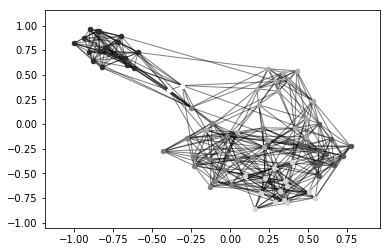

In [72]:
import community
partition = community.best_partition(G)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [71]:
partition = community.best_partition(G)
plist = defaultdict(list)
[plist[a[1]].append(a[0]) for a in partition.items()]
for pl in plist:
    pll=plist[pl]
    pll.sort()
    pll=["%s %s" % (a, k.krp_names[a]) for a in pll]
    print (pl, len(pll), ",".join(pll))

0 17 KR6a 阿含部類,KR6b 本緣部類,KR6c 般若部類,KR6d 法華部類,KR6e 華嚴部類,KR6f 寶積部類,KR6g 涅槃部類,KR6h 大集部類,KR6i 經集部類,KR6j 密教部類,KR6k 律部類,KR6l 毘曇部類,KR6m 中觀部類,KR6n 瑜伽部類,KR6o 論集部類,KR6p 淨土宗部類,KR6v 新編部類
1 15 KR1a 易類,KR1b 書類,KR1c 詩類,KR1d 禮類,KR1e 春秋類,KR1f 孝經類,KR1g 五經總義類,KR1h 四書類,KR1i 樂類,KR3a 儒家類,KR3c 法家類,KR3f 天文算法類,KR3g 術數類,KR5f 太清部,KR5h 續道藏
2 15 KR1j 小學類,KR2n 目錄類,KR3h 藝術類,KR3j 雜家類,KR3k 類書類,KR3l 小說家類,KR4a 楚辭類,KR4b 別集類-漢六朝,KR4c 別集類-唐,KR4d 別集類-宋,KR4e 別集類-明,KR4f 別集類-清,KR4h 總集類,KR4i 詩文評類,KR6s 事彙部類
3 14 KR2a 正史類,KR2b 編年類,KR2c 紀事本末類,KR2d 別史類,KR2e 雜史類,KR2f 詔令奏議類,KR2g 傳記類,KR2h 史鈔類,KR2i 載記類,KR2k 地理類,KR2l 職官類,KR2m 政書類,KR2o 史評類,KR3b 兵家類
4 12 KR2j 時令類,KR3d 農家類,KR3e 醫家類,KR3i 譜錄類,KR4j 詞曲類,KR5a 洞真部,KR5b 洞玄部,KR5c 洞神部,KR5d 太玄部,KR5e 太平部,KR5g 正一部,KR5i 清代道教文獻
5 2 KR6q 禪宗部類,KR6r 史傳部類


In [76]:
nx.write_gexf(G, "ntest.gexf")

In [80]:
reps[6][0]

('m2', 3, 1, 'None')

In [74]:
res[r]

[('KR1h', 834.0),
 ('KR1a', 211.0),
 ('KR1b', 121.0),
 ('KR1g', 112.0),
 ('KR1d', 87.0),
 ('KR1f', 75.0),
 ('KR2g', 74.0),
 ('KR1c', 45.0),
 ('KR6q', 38.0),
 ('KR5f', 36.0)]

In [90]:
tuple(("a", resx[0]))

('a', ('m9', 3, 1, 'pos'))

In [109]:
reps[0][0]

('m2', 70, 35, 'None')